In [64]:
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import pandas as pd
import hvplot.pandas
import numpy as np
import warnings 
import requests
from pathlib import Path
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")
%matplotlib inline

In [65]:
# Grab the Alpaca API Key
#alpaca_api_key = os.environ.get('PKT9GZRNU8ZZ0UAWZ5I3')
# alpaca_secret_key = os.environ.get('JNKg1fGpTBYCJlCaCueN3vnfKZOK39VhhfO6DKDE')
alpaca_api_key = "PK46ENRTMXPI1M3W2IIP"
alpaca_secret_key = 'NnKfZWkUa7UzL64qsKFAbX4BiJWSM6cycdzUW4Jx'

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [66]:
# Set the tickers for Technology - XLK, Health Care - XLV, Financials - XLF,
# Real Estate - XLRE, Energy - XLE, Materials - XLB, Communication - XLC, 
# Consumer Discretionary - XLY, Consumer Staples - XLP, 
# Industrials - XLI, Utilities - XLU

tickers = ["GLD", "VNQ", "USO", "KO", "TSLA", "AAPL", "AGG", "JNK"]

# Set timeframe to 1Day
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# 9+1 to backtest data
start_date = pd.Timestamp("2015-08-18", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-08-18", tz="America/New_York").isoformat()

In [67]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

portfolio_data = alpaca.get_bars(
    tickers, 
    timeframe,
    start = start_date,
    end = end_date
).df

# portfolio_data

In [68]:
portfolio_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,118.75,118.81,116.86,117.34,34852374,187129,117.756760,AAPL
2015-12-02 05:00:00+00:00,117.05,118.11,116.08,116.28,33385643,180616,117.151198,AAPL
2015-12-03 05:00:00+00:00,116.55,116.79,114.22,115.20,41560785,245330,115.434888,AAPL
2015-12-04 05:00:00+00:00,115.29,119.25,115.11,119.03,57776977,307788,118.187290,AAPL
2015-12-07 05:00:00+00:00,118.98,119.86,117.81,118.28,32080754,190809,118.509111,AAPL


In [69]:
# Create the dataframe

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == ticker]['close'])

In [70]:
# Display the dataframe
df

# Sort be descending
df = df.sort_values(by='timestamp' ,ascending=False)


# Get first 5 rows
df.head()

,GLD,VNQ,USO,KO,TSLA,AAPL,AGG,JNK
timestamp,,,,,,,,
2023-08-18 04:00:00+00:00,175.33,80.44,72.79,60.95,215.49,174.49,95.62,90.84
2023-08-17 04:00:00+00:00,175.30,80.19,71.98,60.61,219.22,174.00,95.41,90.80
2023-08-16 04:00:00+00:00,175.57,80.84,71.37,60.48,225.60,176.57,95.51,91.23
2023-08-15 04:00:00+00:00,176.59,81.85,72.62,60.47,232.96,177.45,95.74,91.47
2023-08-14 04:00:00+00:00,177.06,82.78,73.81,60.88,239.76,179.46,96.00,91.76


In [71]:
# Get % change on closing price
df_returns = df.pct_change()

# Change names to 'Ticker % Change'
df_returns.columns = ['GLD % Change', 'VNQ % Change', 'USO % Change', 'KO % Change', 'TSLA % Change', 'AAPL % Change', 'AGG % Change', 'JNK % Change'] 
df_returns.head()

,GLD % Change,VNQ % Change,USO % Change,KO % Change,TSLA % Change,AAPL % Change,AGG % Change,JNK % Change
timestamp,,,,,,,,
2023-08-18 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-17 04:00:00+00:00,-0.000171,-0.003108,-0.011128,-0.005578,0.017309,-0.002808,-0.002196,-0.000440
2023-08-16 04:00:00+00:00,0.001540,0.008106,-0.008475,-0.002145,0.029103,0.014770,0.001048,0.004736
2023-08-15 04:00:00+00:00,0.005810,0.012494,0.017514,-0.000165,0.032624,0.004984,0.002408,0.002631
2023-08-14 04:00:00+00:00,0.002662,0.011362,0.016387,0.006780,0.029190,0.011327,0.002716,0.003170


In [72]:
# Concat df and df_returns
df_template = pd.concat([df, df_returns], 1)
display(df_template.head())
display(df_template.tail())

,GLD,VNQ,USO,KO,TSLA,AAPL,AGG,JNK,GLD % Change,VNQ % Change,USO % Change,KO % Change,TSLA % Change,AAPL % Change,AGG % Change,JNK % Change
timestamp,,,,,,,,,,,,,,,,
2023-08-18 04:00:00+00:00,175.33,80.44,72.79,60.95,215.49,174.49,95.62,90.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-17 04:00:00+00:00,175.30,80.19,71.98,60.61,219.22,174.00,95.41,90.80,-0.000171,-0.003108,-0.011128,-0.005578,0.017309,-0.002808,-0.002196,-0.000440
2023-08-16 04:00:00+00:00,175.57,80.84,71.37,60.48,225.60,176.57,95.51,91.23,0.001540,0.008106,-0.008475,-0.002145,0.029103,0.014770,0.001048,0.004736
2023-08-15 04:00:00+00:00,176.59,81.85,72.62,60.47,232.96,177.45,95.74,91.47,0.005810,0.012494,0.017514,-0.000165,0.032624,0.004984,0.002408,0.002631
2023-08-14 04:00:00+00:00,177.06,82.78,73.81,60.88,239.76,179.46,96.00,91.76,0.002662,0.011362,0.016387,0.006780,0.029190,0.011327,0.002716,0.003170


,GLD,VNQ,USO,KO,TSLA,AAPL,AGG,JNK,GLD % Change,VNQ % Change,USO % Change,KO % Change,TSLA % Change,AAPL % Change,AGG % Change,JNK % Change
timestamp,,,,,,,,,,,,,,,,
2015-12-07 05:00:00+00:00,102.67,78.87,11.72,43.20,231.13,118.28,108.400,NaN,-0.001653,0.000888,0.003425,0.004418,0.019451,0.000423,-0.000369,0.0
2015-12-04 05:00:00+00:00,104.02,79.09,12.46,43.29,230.38,119.03,108.240,NaN,0.013149,0.002789,0.063140,0.002083,-0.003245,0.006341,-0.001476,0.0
2015-12-03 05:00:00+00:00,101.76,77.61,12.77,42.46,232.71,115.20,107.890,NaN,-0.021727,-0.018713,0.024880,-0.019173,0.010114,-0.032177,-0.003234,0.0
2015-12-02 05:00:00+00:00,100.69,78.85,12.48,42.77,231.99,116.28,108.685,NaN,-0.010515,0.015977,-0.022709,0.007301,-0.003094,0.009375,0.007369,0.0
2015-12-01 05:00:00+00:00,102.28,80.49,12.95,42.89,237.19,117.34,108.820,NaN,0.015791,0.020799,0.037660,0.002806,0.022415,0.009116,0.001242,0.0


In [73]:
# Reorganize the columns
new_col = ['GLD','GLD % Change','VNQ','VNQ % Change','USO','USO % Change','KO','KO % Change','TSLA','TSLA % Change','AAPL', 'AAPL % Change','AGG', 'AGG % Change','JNK', 'JNK % Change']
df_template = df_template[new_col]
df_template.head()

,GLD,GLD % Change,VNQ,VNQ % Change,USO,USO % Change,KO,KO % Change,TSLA,TSLA % Change,AAPL,AAPL % Change,AGG,AGG % Change,JNK,JNK % Change
timestamp,,,,,,,,,,,,,,,,
2023-08-18 04:00:00+00:00,175.33,NaN,80.44,NaN,72.79,NaN,60.95,NaN,215.49,NaN,174.49,NaN,95.62,NaN,90.84,NaN
2023-08-17 04:00:00+00:00,175.30,-0.000171,80.19,-0.003108,71.98,-0.011128,60.61,-0.005578,219.22,0.017309,174.00,-0.002808,95.41,-0.002196,90.80,-0.000440
2023-08-16 04:00:00+00:00,175.57,0.001540,80.84,0.008106,71.37,-0.008475,60.48,-0.002145,225.60,0.029103,176.57,0.014770,95.51,0.001048,91.23,0.004736
2023-08-15 04:00:00+00:00,176.59,0.005810,81.85,0.012494,72.62,0.017514,60.47,-0.000165,232.96,0.032624,177.45,0.004984,95.74,0.002408,91.47,0.002631
2023-08-14 04:00:00+00:00,177.06,0.002662,82.78,0.011362,73.81,0.016387,60.88,0.006780,239.76,0.029190,179.46,0.011327,96.00,0.002716,91.76,0.003170


## Step 2: Find Cumulative % Change for Buy/Sell Signal

 (1) Grab % Change df `df_returns` 
 
 (2) Apply weighted average for max sharpe ratio and lowest volatility 
 
 (3) Sum the daily cumulate amount 
 
     if > 0 then Buy 
     
     If <= 0 then Sell 

#### Part 2.b: Minimum Volatility

              GLD   VNQ   USO     KO  TSLA  AAPL    AGG    JNK
allocation  23.01  0.47  0.05  20.26  4.14  1.39  30.76  19.93

In [74]:
## Multiply the weights for each asset, combine into new dataframe, and sum to get total value.

# GLD Weight
df_min_gld = 0.2301 * df_returns["GLD % Change"]
df_min_gld = pd.DataFrame(df_min_gld)

# VNQ Weight 
df_min_vnq = 0.0047 * df_returns["VNQ % Change"]
df_min_vnq = pd.DataFrame(df_min_vnq)

# USO Weight 
df_min_uso = 0.0005 * df_returns["USO % Change"]
df_min_uso = pd.DataFrame(df_min_uso)

# KO Weight 
df_min_ko = 0.2026 * df_returns["KO % Change"]
df_min_ko = pd.DataFrame(df_min_ko)

# TSLA Weight 
df_min_tsla = 0.0414 * df_returns["TSLA % Change"]
df_min_tsla = pd.DataFrame(df_min_tsla)

# AAPL Weight 
df_min_aapl = 0.0139 * df_returns["AAPL % Change"]
df_min_aapl = pd.DataFrame(df_min_aapl)

# AGG Weight 
df_min_agg = 0.3076 * df_returns["AGG % Change"]
df_min_agg = pd.DataFrame(df_min_agg)

# JNK Weight 
df_min_jnk = 0.1993 * df_returns["JNK % Change"]
df_min_jnk = pd.DataFrame(df_min_jnk)

# Concat the weighted assets 
df_min = pd.concat([df_min_gld, df_min_vnq, df_min_uso, df_min_ko, df_min_tsla, df_min_aapl, df_min_agg, df_min_jnk],1)
df_min.head()

#Find sum accross timestamp index 
df_min_sum = df_min.sum(1)
d = {"Weighted Total % Change" : df_min_sum}
df_min_sum = pd.DataFrame(data = d)
display(df_min_sum.tail())
display(df_min_sum.head())

,Weighted Total % Change
timestamp,
2015-12-07 05:00:00+00:00,0.001218
2015-12-04 05:00:00+00:00,0.002992
2015-12-03 05:00:00+00:00,-0.009982
2015-12-02 05:00:00+00:00,0.001392
2015-12-01 05:00:00+00:00,0.005755


,Weighted Total % Change
timestamp,
2023-08-18 04:00:00+00:00,0.000000
2023-08-17 04:00:00+00:00,-0.001275
2023-08-16 04:00:00+00:00,0.002630
2023-08-15 04:00:00+00:00,0.004056
2023-08-14 04:00:00+00:00,0.004881


In [75]:
df_min = df_template

# concat and add new colum for Max Sharpe % Change
df_min['Min Vol % Change By Weights'] = df_min_sum

df_min.head()

,GLD,GLD % Change,VNQ,VNQ % Change,USO,USO % Change,KO,KO % Change,TSLA,TSLA % Change,AAPL,AAPL % Change,AGG,AGG % Change,JNK,JNK % Change,Min Vol % Change By Weights
timestamp,,,,,,,,,,,,,,,,,
2023-08-18 04:00:00+00:00,175.33,NaN,80.44,NaN,72.79,NaN,60.95,NaN,215.49,NaN,174.49,NaN,95.62,NaN,90.84,NaN,0.000000
2023-08-17 04:00:00+00:00,175.30,-0.000171,80.19,-0.003108,71.98,-0.011128,60.61,-0.005578,219.22,0.017309,174.00,-0.002808,95.41,-0.002196,90.80,-0.000440,-0.001275
2023-08-16 04:00:00+00:00,175.57,0.001540,80.84,0.008106,71.37,-0.008475,60.48,-0.002145,225.60,0.029103,176.57,0.014770,95.51,0.001048,91.23,0.004736,0.002630
2023-08-15 04:00:00+00:00,176.59,0.005810,81.85,0.012494,72.62,0.017514,60.47,-0.000165,232.96,0.032624,177.45,0.004984,95.74,0.002408,91.47,0.002631,0.004056
2023-08-14 04:00:00+00:00,177.06,0.002662,82.78,0.011362,73.81,0.016387,60.88,0.006780,239.76,0.029190,179.46,0.011327,96.00,0.002716,91.76,0.003170,0.004881


## Part 3: US Treausry 

In [76]:
# Read in the US Treasury Data
us_treasury = pd.read_csv(
    Path("Resources/USTREASURY-YIELD (2).csv"),
    index_col = "Date"
    # infer_parse_dates = True
)

# View first 5 rows
us_treasury

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2023-08-18,5.53,5.52,5.55,5.52,5.35,4.92,4.63,4.38,4.34,4.26,4.55,4.38
2023-08-17,5.55,5.52,5.56,5.53,5.36,4.94,4.67,4.42,4.38,4.30,4.58,4.41
2023-08-16,5.52,5.53,5.56,5.54,5.37,4.97,4.68,4.42,4.37,4.28,4.55,4.38
2023-08-15,5.53,5.52,5.56,5.55,5.36,4.92,4.64,4.36,4.31,4.21,4.49,4.32
2023-08-14,5.55,5.52,5.56,5.56,5.37,4.96,4.64,4.36,4.29,4.19,4.46,4.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04


In [77]:
# Grab the equivalent dates of basket portfolio 
us_treasury_df = us_treasury["2023-08-18" : "2015-12-01"]

#Display first and last 5 rows
display(us_treasury_df.head())
display(us_treasury_df.tail())

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2023-08-18,5.53,5.52,5.55,5.52,5.35,4.92,4.63,4.38,4.34,4.26,4.55,4.38
2023-08-17,5.55,5.52,5.56,5.53,5.36,4.94,4.67,4.42,4.38,4.30,4.58,4.41
2023-08-16,5.52,5.53,5.56,5.54,5.37,4.97,4.68,4.42,4.37,4.28,4.55,4.38
2023-08-15,5.53,5.52,5.56,5.55,5.36,4.92,4.64,4.36,4.31,4.21,4.49,4.32
2023-08-14,5.55,5.52,5.56,5.56,5.37,4.96,4.64,4.36,4.29,4.19,4.46,4.29


,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2015-12-07,0.21,NaN,0.29,0.57,0.67,0.94,1.24,1.67,2.02,2.23,2.59,2.95
2015-12-04,0.17,NaN,0.23,0.49,0.60,0.96,1.25,1.71,2.06,2.28,2.65,3.01
2015-12-03,0.18,NaN,0.21,0.45,0.57,0.96,1.27,1.74,2.10,2.33,2.72,3.07
2015-12-02,0.19,NaN,0.21,0.42,0.52,0.94,1.23,1.63,1.97,2.18,2.55,2.91
2015-12-01,0.19,NaN,0.21,0.42,0.51,0.91,1.19,1.59,1.93,2.15,2.55,2.91


In [78]:
# Drop all columns besides '1 YR', '5 YR', and '30 YR'
us_treasury_df = us_treasury_df.drop(columns=['1 MO', '2 MO', '3 MO', '6 MO', '2 YR', '3 YR', '7 YR', '10 YR', '20 YR'])

us_treasury_df.head()

,1 YR,5 YR,30 YR
Date,,,
2023-08-18,5.35,4.38,4.38
2023-08-17,5.36,4.42,4.41
2023-08-16,5.37,4.42,4.38
2023-08-15,5.36,4.36,4.32
2023-08-14,5.37,4.36,4.29


In [79]:
# Create duplicate us_treasury_df and remove index
us_trs = us_treasury_df

# reset index
us_trs = us_trs.reset_index(drop=True)

# view first 5 rows
us_trs.tail()

,1 YR,5 YR,30 YR
1927,0.67,1.67,2.95
1928,0.60,1.71,3.01
1929,0.57,1.74,3.07
1930,0.52,1.63,2.91
1931,0.51,1.59,2.91


## Part 4: Technical Indicators 

In [80]:
# Find Cumulative Returns of Max Sharpe Ratio

In [81]:
cum_returns_min = (1 + df_min_sum).cumprod()

cum_returns_min.head()

,Weighted Total % Change
timestamp,
2023-08-18 04:00:00+00:00,1.000000
2023-08-17 04:00:00+00:00,0.998725
2023-08-16 04:00:00+00:00,1.001351
2023-08-15 04:00:00+00:00,1.005413
2023-08-14 04:00:00+00:00,1.010320


<AxesSubplot:title={'center':'Min Volatility Cumulative Returns'}, xlabel='timestamp'>

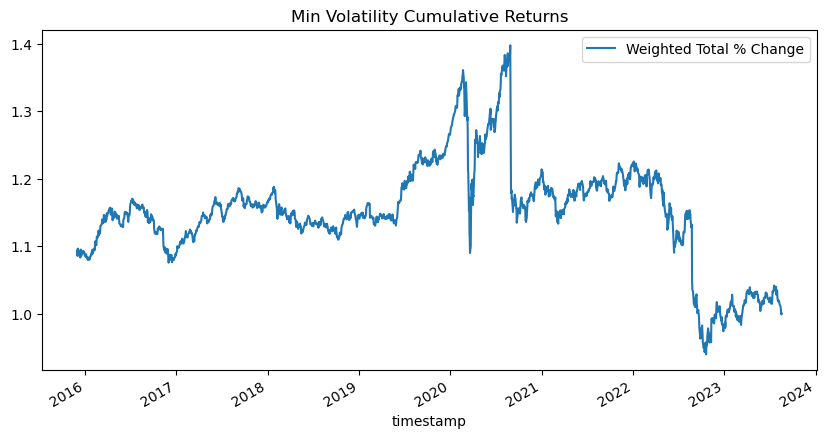

In [82]:
cum_returns_min.plot(figsize=(10,5), title = "Min Volatility Cumulative Returns")

In [83]:
# Set Short (50) and Long Window (200)
short_window = 50
long_window = 200

In [84]:
df_min['50 MA'] = cum_returns_min.rolling(window=short_window).mean()
df_min['200 MA'] = cum_returns_min.rolling(window=long_window).mean()

In [85]:
df_min.head()

,GLD,GLD % Change,VNQ,VNQ % Change,USO,USO % Change,KO,KO % Change,TSLA,TSLA % Change,AAPL,AAPL % Change,AGG,AGG % Change,JNK,JNK % Change,Min Vol % Change By Weights,50 MA,200 MA
timestamp,,,,,,,,,,,,,,,,,,,
2023-08-18 04:00:00+00:00,175.33,NaN,80.44,NaN,72.79,NaN,60.95,NaN,215.49,NaN,174.49,NaN,95.62,NaN,90.84,NaN,0.000000,NaN,NaN
2023-08-17 04:00:00+00:00,175.30,-0.000171,80.19,-0.003108,71.98,-0.011128,60.61,-0.005578,219.22,0.017309,174.00,-0.002808,95.41,-0.002196,90.80,-0.000440,-0.001275,NaN,NaN
2023-08-16 04:00:00+00:00,175.57,0.001540,80.84,0.008106,71.37,-0.008475,60.48,-0.002145,225.60,0.029103,176.57,0.014770,95.51,0.001048,91.23,0.004736,0.002630,NaN,NaN
2023-08-15 04:00:00+00:00,176.59,0.005810,81.85,0.012494,72.62,0.017514,60.47,-0.000165,232.96,0.032624,177.45,0.004984,95.74,0.002408,91.47,0.002631,0.004056,NaN,NaN
2023-08-14 04:00:00+00:00,177.06,0.002662,82.78,0.011362,73.81,0.016387,60.88,0.006780,239.76,0.029190,179.46,0.011327,96.00,0.002716,91.76,0.003170,0.004881,NaN,NaN


## Part 5: Create Buy or Sell Signal 

In [86]:
# Create empty list and append a 'Buy' or 'Sell' signal 
rec = []
for i in df_min['Min Vol % Change By Weights']:
    if i > 0.0:
        rec.append(1)
    else:
        rec.append(0)

In [87]:
# Create 'Recommendation column and assign 'rec' variable to it
df_min['Recommendation'] = rec

display(df_min.head())
display(df_min.tail())

,GLD,GLD % Change,VNQ,VNQ % Change,USO,USO % Change,KO,KO % Change,TSLA,TSLA % Change,AAPL,AAPL % Change,AGG,AGG % Change,JNK,JNK % Change,Min Vol % Change By Weights,50 MA,200 MA,Recommendation
timestamp,,,,,,,,,,,,,,,,,,,,
2023-08-18 04:00:00+00:00,175.33,NaN,80.44,NaN,72.79,NaN,60.95,NaN,215.49,NaN,174.49,NaN,95.62,NaN,90.84,NaN,0.000000,NaN,NaN,0
2023-08-17 04:00:00+00:00,175.30,-0.000171,80.19,-0.003108,71.98,-0.011128,60.61,-0.005578,219.22,0.017309,174.00,-0.002808,95.41,-0.002196,90.80,-0.000440,-0.001275,NaN,NaN,0
2023-08-16 04:00:00+00:00,175.57,0.001540,80.84,0.008106,71.37,-0.008475,60.48,-0.002145,225.60,0.029103,176.57,0.014770,95.51,0.001048,91.23,0.004736,0.002630,NaN,NaN,1
2023-08-15 04:00:00+00:00,176.59,0.005810,81.85,0.012494,72.62,0.017514,60.47,-0.000165,232.96,0.032624,177.45,0.004984,95.74,0.002408,91.47,0.002631,0.004056,NaN,NaN,1
2023-08-14 04:00:00+00:00,177.06,0.002662,82.78,0.011362,73.81,0.016387,60.88,0.006780,239.76,0.029190,179.46,0.011327,96.00,0.002716,91.76,0.003170,0.004881,NaN,NaN,1


,GLD,GLD % Change,VNQ,VNQ % Change,USO,USO % Change,KO,KO % Change,TSLA,TSLA % Change,AAPL,AAPL % Change,AGG,AGG % Change,JNK,JNK % Change,Min Vol % Change By Weights,50 MA,200 MA,Recommendation
timestamp,,,,,,,,,,,,,,,,,,,,
2015-12-07 05:00:00+00:00,102.67,-0.001653,78.87,0.000888,11.72,0.003425,43.20,0.004418,231.13,0.019451,118.28,0.000423,108.400,-0.000369,NaN,0.0,0.001218,1.089914,1.131945,1
2015-12-04 05:00:00+00:00,104.02,0.013149,79.09,0.002789,12.46,0.063140,43.29,0.002083,230.38,-0.003245,119.03,0.006341,108.240,-0.001476,NaN,0.0,0.002992,1.089556,1.131712,1
2015-12-03 05:00:00+00:00,101.76,-0.021727,77.61,-0.018713,12.77,0.024880,42.46,-0.019173,232.71,0.010114,115.20,-0.032177,107.890,-0.003234,NaN,0.0,-0.009982,1.089117,1.131453,0
2015-12-02 05:00:00+00:00,100.69,-0.010515,78.85,0.015977,12.48,-0.022709,42.77,0.007301,231.99,-0.003094,116.28,0.009375,108.685,0.007369,NaN,0.0,0.001392,1.088829,1.131209,1
2015-12-01 05:00:00+00:00,102.28,0.015791,80.49,0.020799,12.95,0.037660,42.89,0.002806,237.19,0.022415,117.34,0.009116,108.820,0.001242,NaN,0.0,0.005755,1.088552,1.130996,1


In [88]:
# Check number of Buys vs. Sells
one = 0
zero = 0
for i in df_min['Recommendation']:
    if i == 1:
        one = one + 1
    elif i == 0: 
        zero = zero + 1    

In [89]:
print(f"The number of Buys for the Max Sharpe Bucket is: {one}")
print(f"The number of Sells for the Max Sharpe Bucket is: {zero}")

The number of Buys for the Max Sharpe Bucket is: 891
The number of Sells for the Max Sharpe Bucket is: 1051


In [90]:
date = df_template.index


In [91]:
# Replace NaN values with SimpleImputer. Fit and Transform this data.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_min = imp_mean.fit_transform(df_min)

# Make aapl_df as a DataFrame and review first 5 rows in data
df_min = pd.DataFrame(df_min)
df_min.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,175.33,-0.000237,80.44,0.000087,72.79,0.000105,60.95,-0.000109,215.49,0.002196,174.49,0.000766,95.62,0.000072,90.84,0.000104,0.000000,1.152515,1.159432,0.0
1,175.30,-0.000171,80.19,-0.003108,71.98,-0.011128,60.61,-0.005578,219.22,0.017309,174.00,-0.002808,95.41,-0.002196,90.80,-0.000440,-0.001275,1.152515,1.159432,0.0
2,175.57,0.001540,80.84,0.008106,71.37,-0.008475,60.48,-0.002145,225.60,0.029103,176.57,0.014770,95.51,0.001048,91.23,0.004736,0.002630,1.152515,1.159432,1.0
3,176.59,0.005810,81.85,0.012494,72.62,0.017514,60.47,-0.000165,232.96,0.032624,177.45,0.004984,95.74,0.002408,91.47,0.002631,0.004056,1.152515,1.159432,1.0
4,177.06,0.002662,82.78,0.011362,73.81,0.016387,60.88,0.006780,239.76,0.029190,179.46,0.011327,96.00,0.002716,91.76,0.003170,0.004881,1.152515,1.159432,1.0


In [92]:
df_min = pd.concat([df_min, us_trs], 1)

df_min.tail(30)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,1 YR,5 YR,30 YR
1912,104.72,0.016502,76.27,0.002366,9.09,-0.015168,41.85,-0.000716,200.31,-0.028470,...,0.000368,102.128523,0.0,0.002292,1.110906,1.137037,1.0,0.67,1.81,3.04
1913,104.21,-0.004870,77.38,0.014554,9.17,0.008801,42.12,0.006452,209.97,0.048225,...,-0.002297,102.128523,0.0,0.001916,1.109849,1.136827,1.0,0.66,1.73,2.95
1914,104.74,0.005086,77.90,0.006720,9.25,0.008724,41.58,-0.012821,207.85,-0.010097,...,-0.002210,102.128523,0.0,-0.002688,1.108755,1.136586,0.0,0.64,1.73,2.96
1915,105.68,0.008975,77.46,-0.005648,9.80,0.059459,41.51,-0.001684,211.00,0.015155,...,0.002861,102.128523,0.0,0.003013,1.107564,1.136370,1.0,0.65,1.74,3.00
1916,106.15,0.004447,78.51,0.013555,9.90,0.010204,41.62,0.002650,215.65,0.022038,...,-0.002209,102.128523,0.0,0.001789,1.106391,1.136174,1.0,0.66,1.71,2.96
1917,104.67,-0.013943,80.07,0.019870,10.11,0.021212,42.32,0.016819,219.04,0.015720,...,0.000092,102.128523,0.0,0.001595,1.105228,1.135995,1.0,0.64,1.67,2.92
1918,103.18,-0.014235,80.29,0.002748,10.66,0.054402,42.55,0.005435,223.43,0.020042,...,-0.003781,102.128523,0.0,-0.002190,1.104016,1.135791,0.0,0.67,1.67,2.90
1919,102.89,-0.002811,78.77,-0.018931,10.98,0.030019,42.40,-0.003525,223.41,-0.000090,...,-0.000463,102.128523,0.0,-0.001224,1.102866,1.135596,0.0,0.69,1.73,2.94
1920,101.46,-0.013898,79.73,0.012187,11.00,0.001821,42.96,0.013208,240.01,0.074303,...,0.000370,102.128523,0.0,0.002714,1.101920,1.135442,1.0,0.70,1.75,3.02
1921,101.42,-0.000394,80.43,0.008780,10.93,-0.006364,43.57,0.014199,238.09,-0.008000,...,-0.002685,102.128523,0.0,0.001939,1.101030,1.135300,1.0,0.69,1.71,3.00


In [93]:
# Replace NaN values with SimpleImputer. Fit and Transform this data.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_min = imp_mean.fit_transform(df_min)

# Make aapl_df as a DataFrame and review first 5 rows in data
df_min = pd.DataFrame(df_min)
df_min.tail()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1937,102.67,-0.001653,78.87,0.000888,11.72,0.003425,43.20,0.004418,231.13,0.019451,...,-0.000369,102.128523,0.0,0.001218,1.089914,1.131945,1.0,1.639022,1.929995,2.665611
1938,104.02,0.013149,79.09,0.002789,12.46,0.063140,43.29,0.002083,230.38,-0.003245,...,-0.001476,102.128523,0.0,0.002992,1.089556,1.131712,1.0,1.639022,1.929995,2.665611
1939,101.76,-0.021727,77.61,-0.018713,12.77,0.024880,42.46,-0.019173,232.71,0.010114,...,-0.003234,102.128523,0.0,-0.009982,1.089117,1.131453,0.0,1.639022,1.929995,2.665611
1940,100.69,-0.010515,78.85,0.015977,12.48,-0.022709,42.77,0.007301,231.99,-0.003094,...,0.007369,102.128523,0.0,0.001392,1.088829,1.131209,1.0,1.639022,1.929995,2.665611
1941,102.28,0.015791,80.49,0.020799,12.95,0.037660,42.89,0.002806,237.19,0.022415,...,0.001242,102.128523,0.0,0.005755,1.088552,1.130996,1.0,1.639022,1.929995,2.665611


In [94]:
# Reset Index to 'Date'
df_min['Date'] = pd.to_datetime(date)
df_min = df_min.set_index('Date')

df_min.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-18 04:00:00+00:00,175.33,-0.000237,80.44,0.000087,72.79,0.000105,60.95,-0.000109,215.49,0.002196,...,0.000072,90.84,0.000104,0.000000,1.152515,1.159432,0.0,5.35,4.38,4.38
2023-08-17 04:00:00+00:00,175.30,-0.000171,80.19,-0.003108,71.98,-0.011128,60.61,-0.005578,219.22,0.017309,...,-0.002196,90.80,-0.000440,-0.001275,1.152515,1.159432,0.0,5.36,4.42,4.41
2023-08-16 04:00:00+00:00,175.57,0.001540,80.84,0.008106,71.37,-0.008475,60.48,-0.002145,225.60,0.029103,...,0.001048,91.23,0.004736,0.002630,1.152515,1.159432,1.0,5.37,4.42,4.38
2023-08-15 04:00:00+00:00,176.59,0.005810,81.85,0.012494,72.62,0.017514,60.47,-0.000165,232.96,0.032624,...,0.002408,91.47,0.002631,0.004056,1.152515,1.159432,1.0,5.36,4.36,4.32
2023-08-14 04:00:00+00:00,177.06,0.002662,82.78,0.011362,73.81,0.016387,60.88,0.006780,239.76,0.029190,...,0.002716,91.76,0.003170,0.004881,1.152515,1.159432,1.0,5.37,4.36,4.29


In [95]:
columns = ['GLD', 'GLD % Change', 'VNQ', 'VNQ % Change', 'USO', 'USO % Change', 'KO', 'KO % Change', 'TSLA', 'TSLA % Change', 'AAPL', 'AAPL % Change', 'AGG', 'AGG % Change', 'JNK', 'JNK % Change', '50 MA', '200 MA', 'Min Vol % Change By Weights', 'Recommendation', '1 YR', '5 YR', '30 YR']

df_min[columns] = df_min
df_min = df_min[columns]


df_min.head()

,GLD,GLD % Change,VNQ,VNQ % Change,USO,USO % Change,KO,KO % Change,TSLA,TSLA % Change,...,AGG % Change,JNK,JNK % Change,50 MA,200 MA,Min Vol % Change By Weights,Recommendation,1 YR,5 YR,30 YR
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-18 04:00:00+00:00,175.33,-0.000237,80.44,0.000087,72.79,0.000105,60.95,-0.000109,215.49,0.002196,...,0.000072,90.84,0.000104,0.000000,1.152515,1.159432,0.0,5.35,4.38,4.38
2023-08-17 04:00:00+00:00,175.30,-0.000171,80.19,-0.003108,71.98,-0.011128,60.61,-0.005578,219.22,0.017309,...,-0.002196,90.80,-0.000440,-0.001275,1.152515,1.159432,0.0,5.36,4.42,4.41
2023-08-16 04:00:00+00:00,175.57,0.001540,80.84,0.008106,71.37,-0.008475,60.48,-0.002145,225.60,0.029103,...,0.001048,91.23,0.004736,0.002630,1.152515,1.159432,1.0,5.37,4.42,4.38
2023-08-15 04:00:00+00:00,176.59,0.005810,81.85,0.012494,72.62,0.017514,60.47,-0.000165,232.96,0.032624,...,0.002408,91.47,0.002631,0.004056,1.152515,1.159432,1.0,5.36,4.36,4.32
2023-08-14 04:00:00+00:00,177.06,0.002662,82.78,0.011362,73.81,0.016387,60.88,0.006780,239.76,0.029190,...,0.002716,91.76,0.003170,0.004881,1.152515,1.159432,1.0,5.37,4.36,4.29


In [ ]:
# Change the Recommendation Column to last Column in Dataset. Then change the name to 'Signal'
df_max.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,19]]

df_max['Signal'] = df_max['Recommendation']

df_max.head()

## Export as .csv file


In [96]:
df_min.to_csv('min_rating.csv')